In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("demo1.csv")
df

,math score,reading score,writing score,placement score,placement offer count,club join year
0,80,68,70,89,3,2019
1,71,61,85,91,3,2019
2,79,16,87,77,2,2018
3,61,77,74,76,2,2020
4,78,71,67,90,3,2019
5,73,68,90,80,2,2019
6,77,62,70,35,2,2020
7,74,45,80,12,1,2019
8,76,60,79,77,2,2020
9,75,65,85,87,3,2018


<AxesSubplot:>

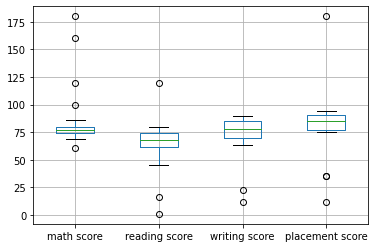

In [9]:
col = ['math score', 'reading score' , 'writing score','placement score']
df.boxplot(col)

In [10]:
print(np.where(df['math score']>90))

(array([10, 21, 25, 28], dtype=int64),)


In [11]:
print(np.where(df['reading score']<25))
print(np.where(df['writing score']<30))

(array([ 2, 14], dtype=int64),)
(array([10, 17], dtype=int64),)


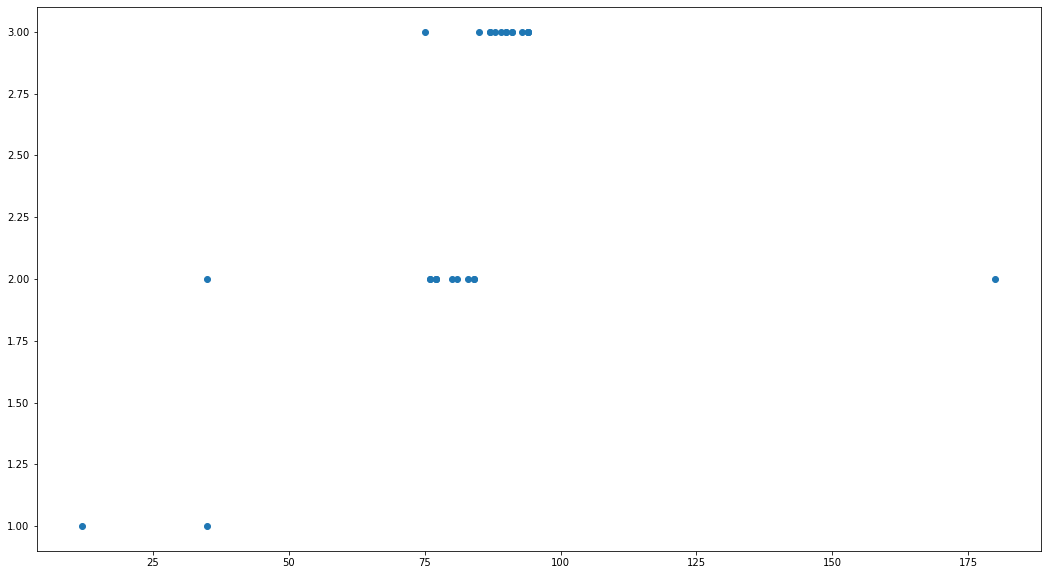

In [17]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df['placement score'], df['placement offer count'])
plt.show()


In [18]:
ax.set_xlabel('(Proportion non-retail business acres)/(town)')
ax.set_ylabel('(Full-value property-tax rate)/($10,000)')


Text(3.200000000000017, 0.5, '(Full-value property-tax rate)/($10,000)')

In [21]:
print(np.where((df['placement score']<50) & (df['placement offer count']>1)))
print(np.where((df['placement score']>85) & (df['placement offer count']<3)))


(array([6], dtype=int64),)
(array([11], dtype=int64),)


# Detecting outliers using Z-Score

In [22]:
from scipy import stats

In [23]:
z = np.abs(stats.zscore(df['math score']))

In [24]:
print(z)
 


[0.17564553 0.5282877  0.21482799 0.92011234 0.25401045 0.44992277
 0.29319292 0.41074031 0.33237538 0.37155785 2.95895157 0.21482799
 0.17564553 0.25401045 0.37155785 0.25401045 0.05944926 0.17564553
 0.37155785 0.0972806  0.60665263 0.60800375 0.48910524 0.41074031
 0.37155785 3.74260085 0.48910524 0.5282877  1.39165302]


In [25]:
threshold = 0.18

In [27]:
sample_outliers = np.where(z <threshold)
sample_outliers

(array([ 0, 12, 16, 17, 19], dtype=int64),)

# Detecting outliers using Inter Quantile Range(IQR):

In [28]:
sorted_rscore= sorted(df['reading score'])

In [29]:
sorted_rscore

[1,
 16,
 45,
 60,
 60,
 61,
 62,
 62,
 62,
 65,
 65,
 65,
 67,
 67,
 68,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 77,
 77,
 77,
 78,
 79,
 80,
 120]

In [30]:
q1 = np.percentile(sorted_rscore, 25) 
q3 = np.percentile(sorted_rscore, 75)
print(q1,q3)

62.0 74.0


In [31]:
IQR = q3-q1

In [32]:
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
print(lwr_bound, upr_bound)

44.0 92.0


In [33]:
r_outliers = []
for i in sorted_rscore:
    if (i<lwr_bound or i>upr_bound):
        r_outliers.append(i)
print(r_outliers)


[1, 16, 120]


In [34]:
new_df=df
for i in sample_outliers:
    new_df.drop(i,inplace=True)
new_df

,math score,reading score,writing score,placement score,placement offer count,club join year
1,71,61,85,91,3,2019
2,79,16,87,77,2,2018
3,61,77,74,76,2,2020
4,78,71,67,90,3,2019
5,73,68,90,80,2,2019
6,77,62,70,35,2,2020
7,74,45,80,12,1,2019
8,76,60,79,77,2,2020
9,75,65,85,87,3,2018
10,160,67,12,83,2,2020


# ●	Quantile based flooring and capping:

In [35]:
df_stud=df

In [36]:
ninetieth_percentile = np.percentile(df_stud['math score'], 90)

In [37]:
b = np.where(df_stud['math score']>ninetieth_percentile,
ninetieth_percentile, df_stud['math score'])
print("New Array : ", b)

New Array :  [ 71.  79.  61.  78.  73.  77.  74.  76.  75. 114.  79.  78.  75.  78.
  75.  69. 100.  72.  74.  75. 114.  72.  71. 114.]


In [38]:
df_stud.insert(1,"m score",b,True)
df_stud

,math score,m score,reading score,writing score,placement score,placement offer count,club join year
1,71,71.0,61,85,91,3,2019
2,79,79.0,16,87,77,2,2018
3,61,61.0,77,74,76,2,2020
4,78,78.0,71,67,90,3,2019
5,73,73.0,68,90,80,2,2019
6,77,77.0,62,70,35,2,2020
7,74,74.0,45,80,12,1,2019
8,76,76.0,60,79,77,2,2020
9,75,75.0,65,85,87,3,2018
10,160,114.0,67,12,83,2,2020


<AxesSubplot:>

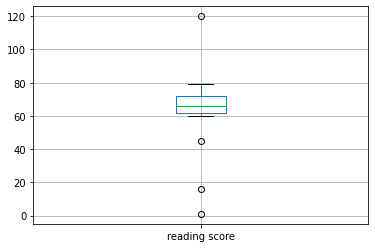

In [39]:
col = ['reading score']
df.boxplot(col)

In [40]:
median=np.median(sorted_rscore)
median

68.0

In [41]:
refined_df=df
refined_df['reading score'] = np.where(refined_df['reading score'] >upr_bound, median,refined_df['reading score'])


In [43]:
refined_df

,math score,m score,reading score,writing score,placement score,placement offer count,club join year
1,71,71.0,61.0,85,91,3,2019
2,79,79.0,16.0,87,77,2,2018
3,61,61.0,77.0,74,76,2,2020
4,78,78.0,71.0,67,90,3,2019
5,73,73.0,68.0,90,80,2,2019
6,77,77.0,62.0,70,35,2,2020
7,74,74.0,45.0,80,12,1,2019
8,76,76.0,60.0,79,77,2,2020
9,75,75.0,65.0,85,87,3,2018
10,160,114.0,67.0,12,83,2,2020


In [44]:
refined_df['reading score'] = np.where(refined_df['reading score'] <lwr_bound, median,refined_df['reading score'])

In [45]:
refined_df

,math score,m score,reading score,writing score,placement score,placement offer count,club join year
1,71,71.0,61.0,85,91,3,2019
2,79,79.0,68.0,87,77,2,2018
3,61,61.0,77.0,74,76,2,2020
4,78,78.0,71.0,67,90,3,2019
5,73,73.0,68.0,90,80,2,2019
6,77,77.0,62.0,70,35,2,2020
7,74,74.0,45.0,80,12,1,2019
8,76,76.0,60.0,79,77,2,2020
9,75,75.0,65.0,85,87,3,2018
10,160,114.0,67.0,12,83,2,2020


<AxesSubplot:>

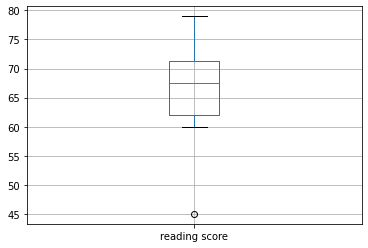

In [46]:
col = ['reading score']
refined_df.boxplot(col)

In [47]:
df

,math score,m score,reading score,writing score,placement score,placement offer count,club join year
1,71,71.0,61.0,85,91,3,2019
2,79,79.0,68.0,87,77,2,2018
3,61,61.0,77.0,74,76,2,2020
4,78,78.0,71.0,67,90,3,2019
5,73,73.0,68.0,90,80,2,2019
6,77,77.0,62.0,70,35,2,2020
7,74,74.0,45.0,80,12,1,2019
8,76,76.0,60.0,79,77,2,2020
9,75,75.0,65.0,85,87,3,2018
10,160,114.0,67.0,12,83,2,2020


<AxesSubplot:ylabel='Frequency'>

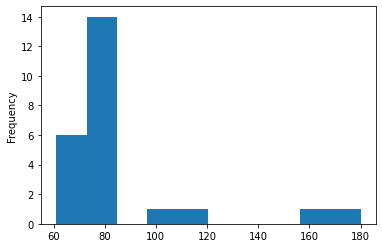

In [48]:
import matplotlib.pyplot as plt 
new_df['math score'].plot(kind = 'hist')

In [49]:
df['log_math'] = np.log10(df['math score'])

<AxesSubplot:ylabel='Frequency'>

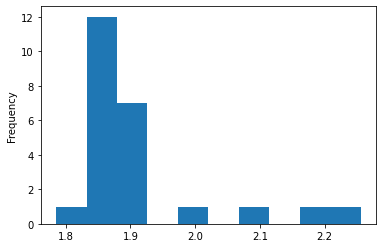

In [50]:
df['log_math'].plot(kind = 'hist')